# Лабораторная работа №1

> =========================================
>
> Тема: Кластеризация, снижение размерности пространства признаков
>
> Набор данных: Транспорт
>
> Студент: Шацкий Никита ИУ7-21М
> 
>=========================================

## 0. Импорты

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from kneed import KneeLocator
from collections import Counter
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

## 1. Данные

### 1.1. Чтение

In [60]:
pd.set_option('display.max_columns', None)

dfInit = pd.read_csv('./data/vehicle.csv', delimiter=';', encoding='utf8')


df = dfInit.copy(deep=True)

df

,COMPACTNESS,CIRCULARITY,DISTANCE CIRCULARITY,RADIUS RATIO,PR.AXIS ASPECT RATIO,MAX.LENGTH ASPECT RATIO,SCATTER RATIO,ELONGATEDNESS,PR.AXIS RECTANGULARITY,MAX.LENGTH RECTANGULARITY,SCALED VARIANCE_MAJOR,SCALED VARIANCE_MINOR,SCALED RADIUS OF GYRATION,SKEWNESS ABOUT_MAJOR,SKEWNESS ABOUT_MINOR,KURTOSIS ABOUT_MAJOR,KURTOSIS ABOUT_MINOR,HOLLOWS RATIO
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39,87,183,64,8,169,40,20,134,200,422,149,72,7,25,188,195
842,89,46,84,163,66,11,159,43,20,159,173,368,176,72,1,20,186,197
843,106,54,101,222,67,12,222,30,25,173,228,721,200,70,3,4,187,201
844,86,36,78,146,58,7,135,50,18,124,155,270,148,66,0,25,190,195


### 1.2. Нормализация

In [61]:
dfCopy = df.copy(deep=True)
# Мин-макс нормализация
df = (df - df.min()) / (df.max() - df.min())

df

,COMPACTNESS,CIRCULARITY,DISTANCE CIRCULARITY,RADIUS RATIO,PR.AXIS ASPECT RATIO,MAX.LENGTH ASPECT RATIO,SCATTER RATIO,ELONGATEDNESS,PR.AXIS RECTANGULARITY,MAX.LENGTH RECTANGULARITY,SCALED VARIANCE_MAJOR,SCALED VARIANCE_MINOR,SCALED RADIUS OF GYRATION,SKEWNESS ABOUT_MAJOR,SKEWNESS ABOUT_MINOR,KURTOSIS ABOUT_MAJOR,KURTOSIS ABOUT_MINOR,HOLLOWS RATIO
0,0.478261,0.576923,0.597222,0.323144,0.274725,0.150943,0.326797,0.457143,0.250000,0.585714,0.242105,0.233813,0.471698,0.144737,0.272727,0.390244,0.366667,0.533333
1,0.391304,0.307692,0.611111,0.161572,0.109890,0.132075,0.241830,0.542857,0.166667,0.357143,0.210526,0.175060,0.308176,0.171053,0.409091,0.341463,0.433333,0.600000
2,0.673913,0.653846,0.916667,0.458515,0.208791,0.150943,0.620915,0.171429,0.500000,0.571429,0.489474,0.540767,0.698113,0.184211,0.636364,0.219512,0.400000,0.500000
3,0.434783,0.307692,0.583333,0.240175,0.175824,0.132075,0.209150,0.571429,0.166667,0.357143,0.157895,0.149880,0.113208,0.052632,0.272727,0.243902,0.766667,0.866667
4,0.260870,0.423077,0.416667,0.441048,0.615385,0.943396,0.241830,0.542857,0.166667,0.371429,0.584211,0.169065,0.496855,0.894737,0.409091,0.268293,0.133333,0.066667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,0.434783,0.230769,0.652778,0.344978,0.186813,0.113208,0.372549,0.400000,0.250000,0.228571,0.368421,0.285372,0.251572,0.171053,0.318182,0.609756,0.400000,0.466667
842,0.347826,0.500000,0.611111,0.257642,0.208791,0.169811,0.307190,0.485714,0.250000,0.585714,0.226316,0.220624,0.421384,0.171053,0.045455,0.487805,0.333333,0.533333
843,0.717391,0.807692,0.847222,0.515284,0.219780,0.188679,0.718954,0.114286,0.666667,0.785714,0.515789,0.643885,0.572327,0.144737,0.136364,0.097561,0.366667,0.666667
844,0.282609,0.115385,0.527778,0.183406,0.120879,0.094340,0.150327,0.685714,0.083333,0.085714,0.131579,0.103118,0.245283,0.092105,0.000000,0.609756,0.466667,0.466667


### 1.3. Проверка выбросов

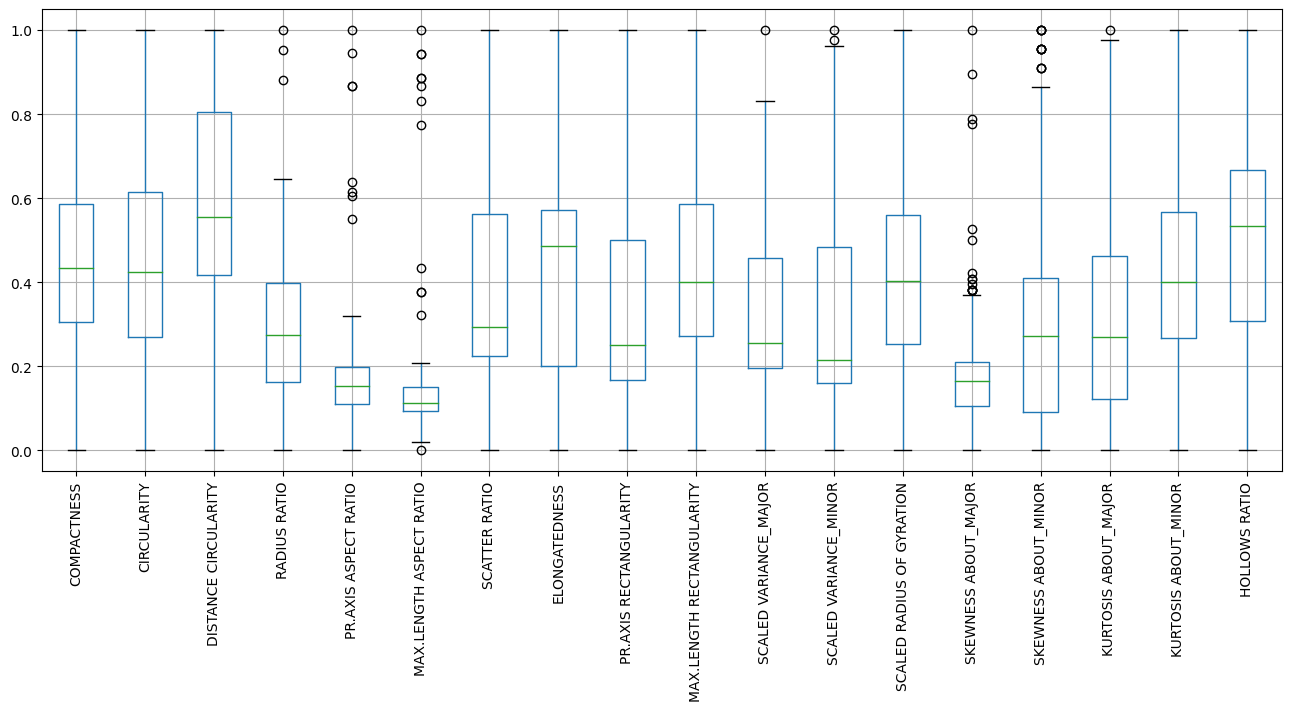

In [62]:
ax = df.boxplot(column=list(df.columns), figsize=(16,6))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()

### 1.5. Удаление выбросов

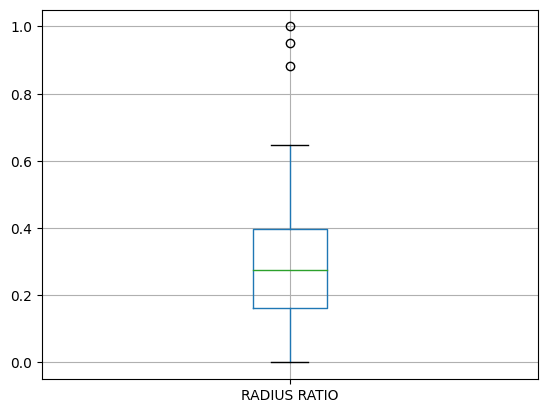

In [63]:
# 1. Просмотреть выбросы
df.boxplot(column=["RADIUS RATIO"])
plt.show()

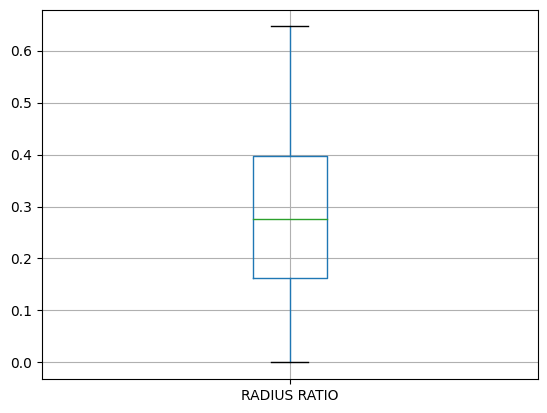

In [64]:
# 2. Удалить выбросы
indexesToDelete = df[df["RADIUS RATIO"] > 0.85].index

df = df.drop(indexesToDelete, axis=0)
dfCopy = dfCopy.drop(indexesToDelete, axis=0)

# 3. Проверить результат
df.boxplot(column=["RADIUS RATIO"])
plt.show()

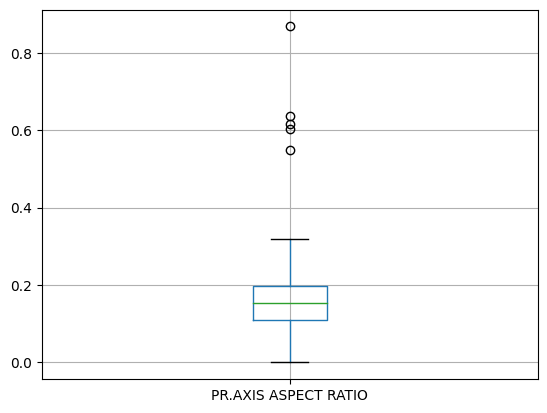

In [65]:
# 1. Просмотреть выбросы
df.boxplot(column=["PR.AXIS ASPECT RATIO"])
plt.show()

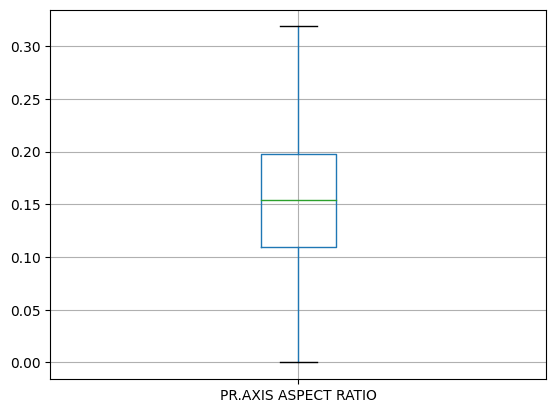

In [66]:
# 2. Удалить выбросы
indexesToDelete = df[df["PR.AXIS ASPECT RATIO"] > 0.495].index

df = df.drop(indexesToDelete, axis=0)
dfCopy = dfCopy.drop(indexesToDelete, axis=0)

# 3. Проверить результат
df.boxplot(column=["PR.AXIS ASPECT RATIO"])
plt.show()

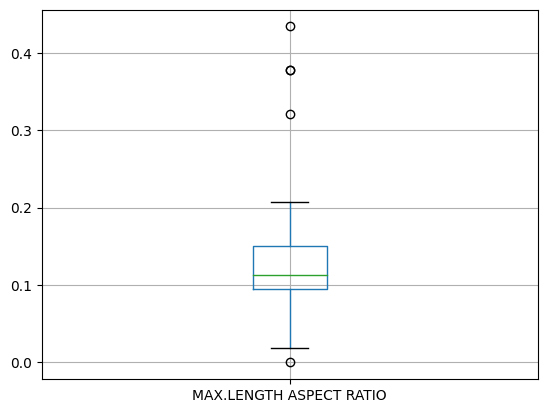

In [67]:
# 1. Просмотреть выбросы
df.boxplot(column=["MAX.LENGTH ASPECT RATIO"])
plt.show()

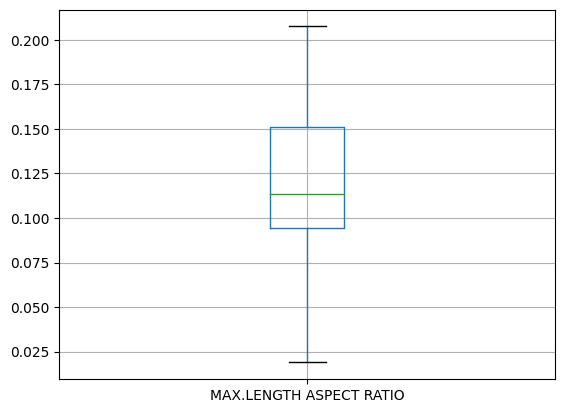

In [68]:
# 2. Удалить выбросы
indexesToDelete = df[(df["MAX.LENGTH ASPECT RATIO"] < 0.01) | (df["MAX.LENGTH ASPECT RATIO"] > 0.32)].index

df = df.drop(indexesToDelete, axis=0)
dfCopy = dfCopy.drop(indexesToDelete, axis=0)

# 3. Проверить результат
df.boxplot(column=["MAX.LENGTH ASPECT RATIO"])
plt.show()

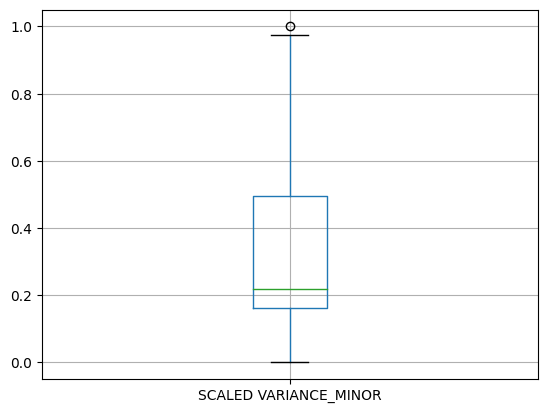

In [69]:
# 1. Просмотреть выбросы
df.boxplot(column=["SCALED VARIANCE_MINOR"])
plt.show()

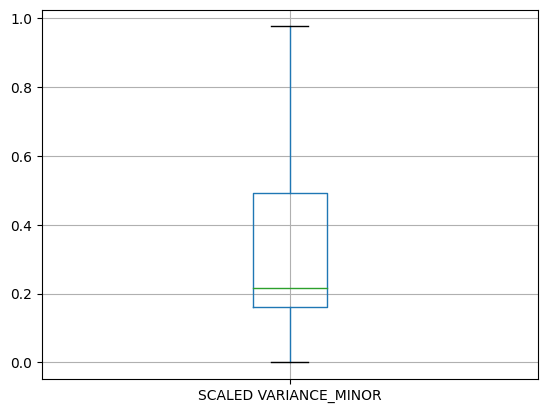

In [70]:
# 2. Удалить выбросы
indexesToDelete = df[df["SCALED VARIANCE_MINOR"] > 0.999].index

df = df.drop(indexesToDelete, axis=0)
dfCopy = dfCopy.drop(indexesToDelete, axis=0)

# 3. Проверить результат
df.boxplot(column=["SCALED VARIANCE_MINOR"])
plt.show()

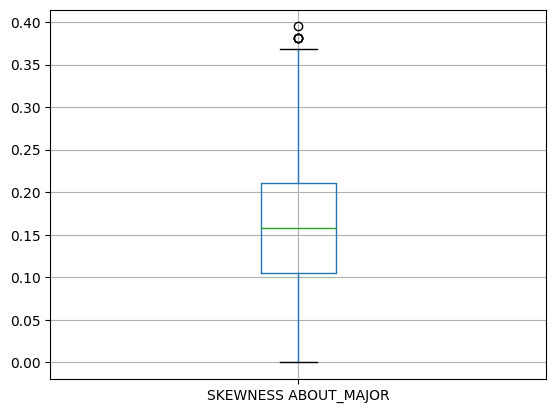

In [71]:
# 1. Просмотреть выбросы
df.boxplot(column=["SKEWNESS ABOUT_MAJOR"])
plt.show()

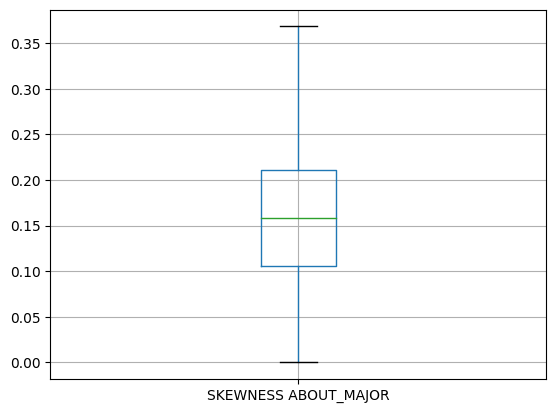

In [72]:
# 2. Удалить выбросы
indexesToDelete = df[df["SKEWNESS ABOUT_MAJOR"] > 0.38].index

df = df.drop(indexesToDelete, axis=0)
dfCopy = dfCopy.drop(indexesToDelete, axis=0)

# 3. Проверить результат
df.boxplot(column=["SKEWNESS ABOUT_MAJOR"])
plt.show()

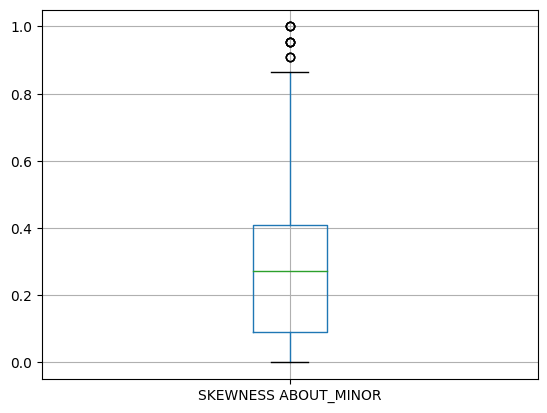

In [73]:
# 1. Просмотреть выбросы
df.boxplot(column=["SKEWNESS ABOUT_MINOR"])
plt.show()

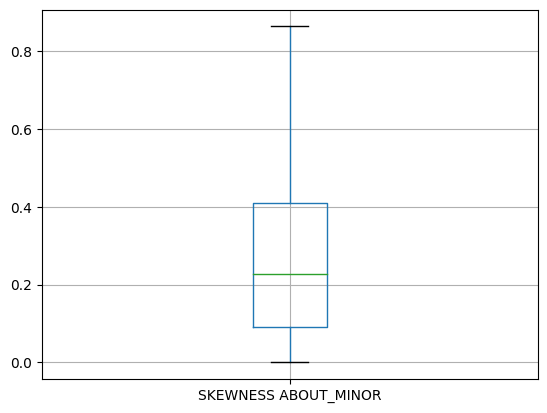

In [74]:
# 2. Удалить выбросы
indexesToDelete = df[df["SKEWNESS ABOUT_MINOR"] > 0.9].index

df = df.drop(indexesToDelete, axis=0)
dfCopy = dfCopy.drop(indexesToDelete, axis=0)

# 3. Проверить результат
df.boxplot(column=["SKEWNESS ABOUT_MINOR"])
plt.show()

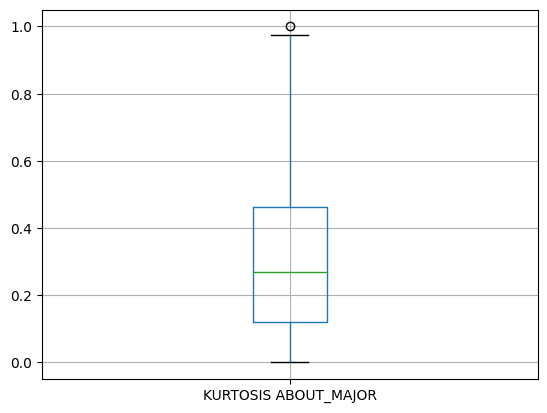

In [75]:
# 1. Просмотреть выбросы
df.boxplot(column=["KURTOSIS ABOUT_MAJOR"])
plt.show()

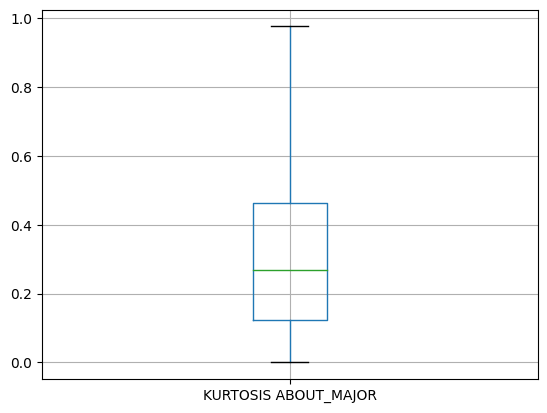

In [76]:
# 2. Удалить выбросы
indexesToDelete = df[df["KURTOSIS ABOUT_MAJOR"] > 0.999].index

df = df.drop(indexesToDelete, axis=0)
dfCopy = dfCopy.drop(indexesToDelete, axis=0)

# 3. Проверить результат
df.boxplot(column=["KURTOSIS ABOUT_MAJOR"])
plt.show()

## 2. Выполнение

### 2.1. Визуализация данных

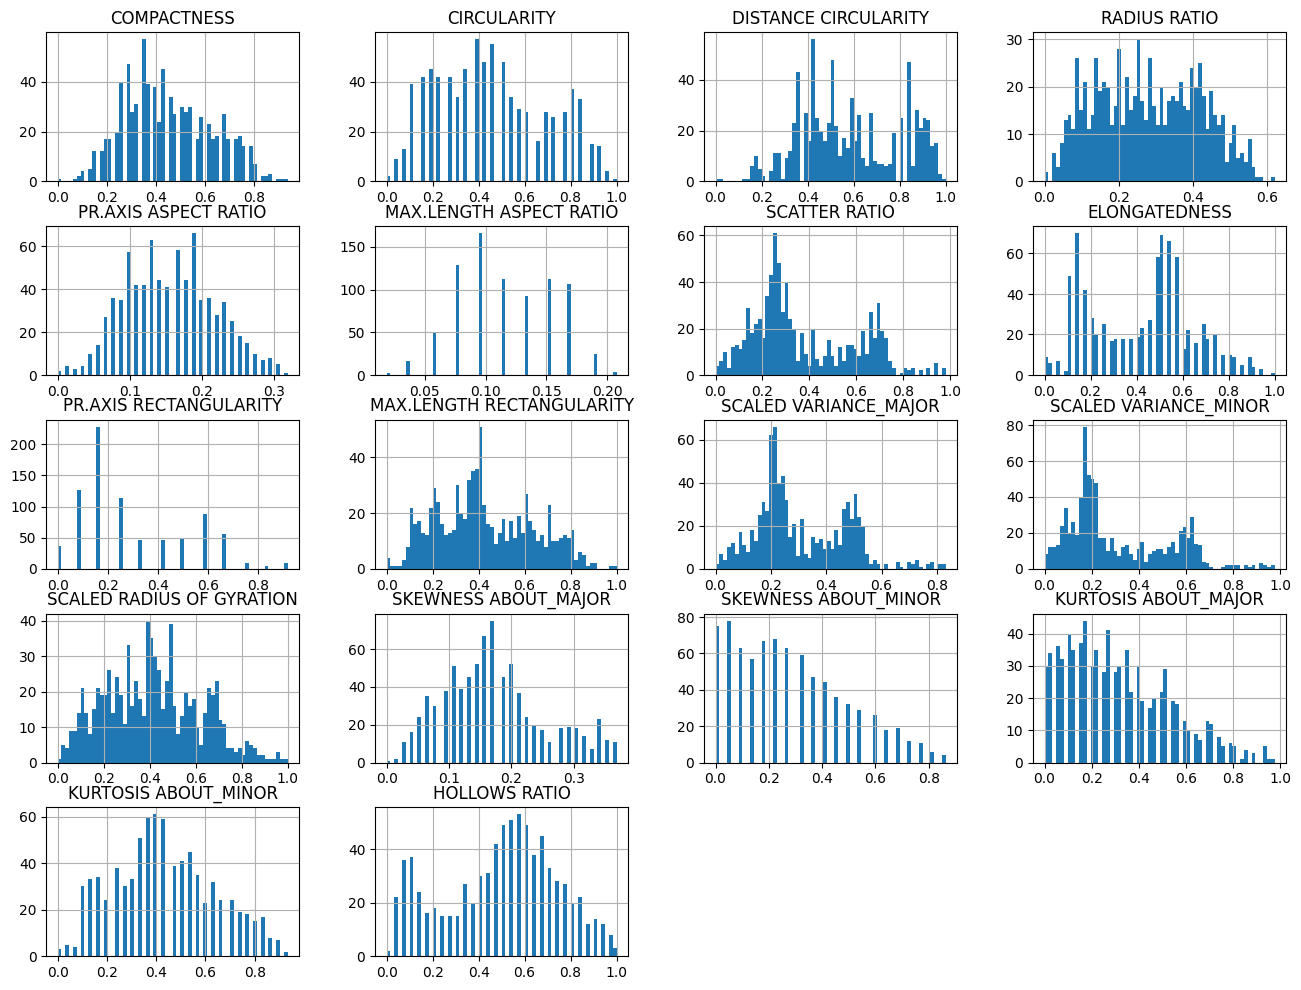

In [77]:
df.hist(bins=60, figsize=(16,12), grid=True)
plt.show()

### 2.2. Тепловая карта (корреляция признаков)

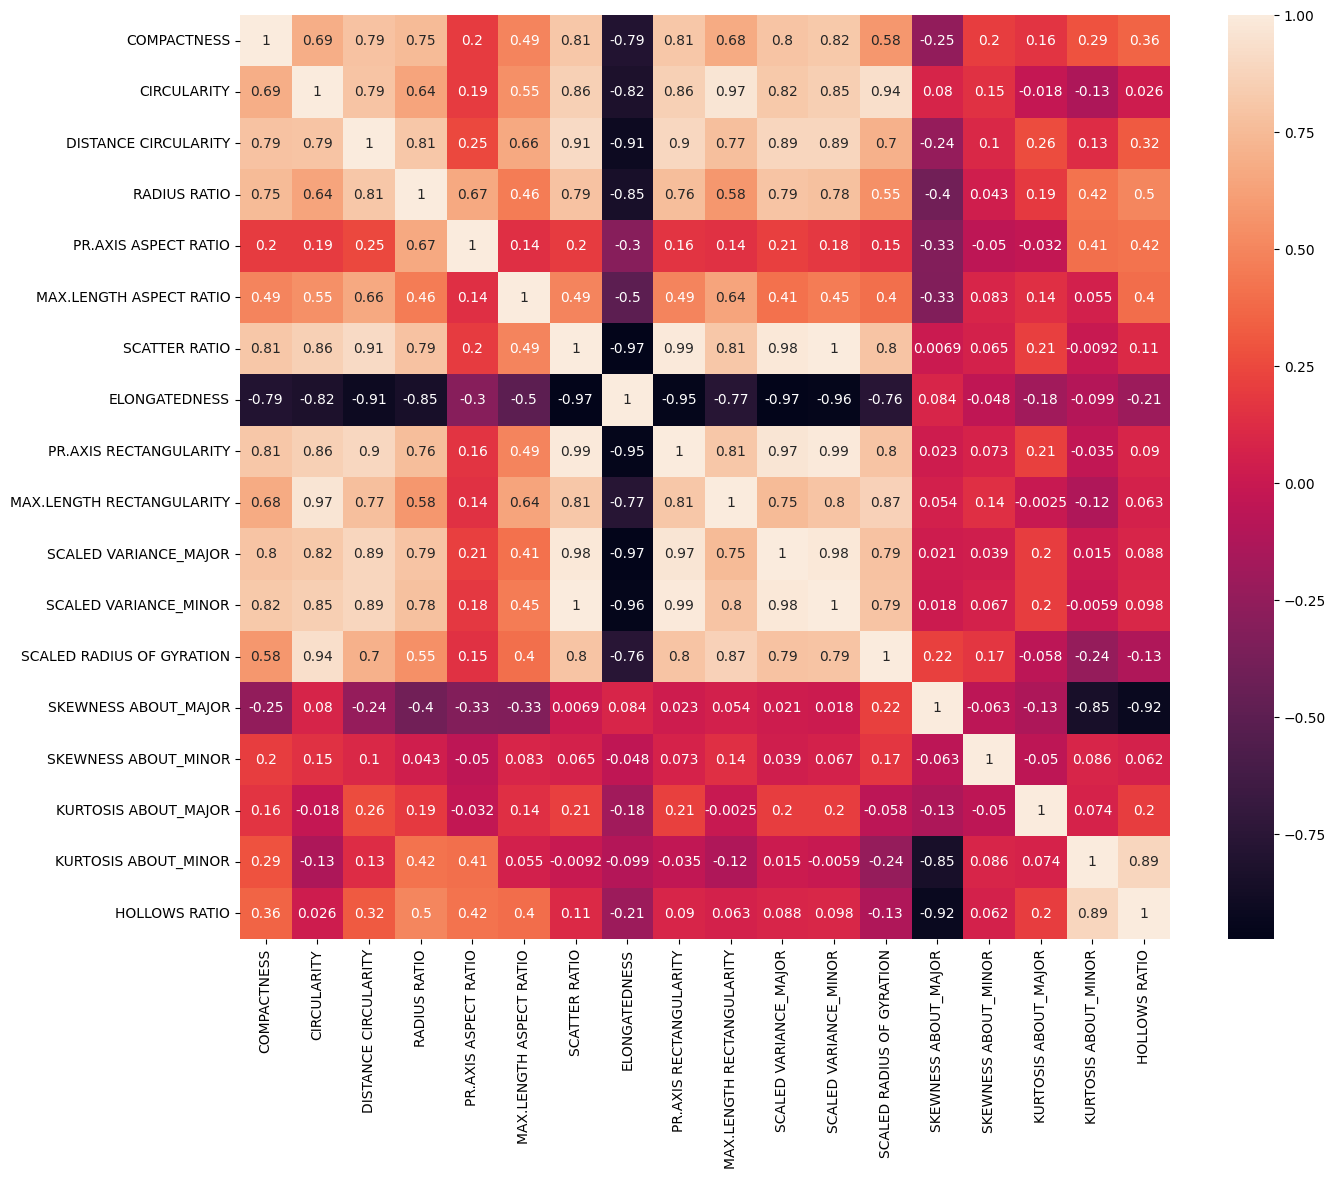

In [78]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr().round(decimals=4), annot=True)
plt.show()

### 2.3. k-means

In [79]:
import warnings
warnings.filterwarnings("ignore") # убрать FutureWarning (возникает в KMeans функции)

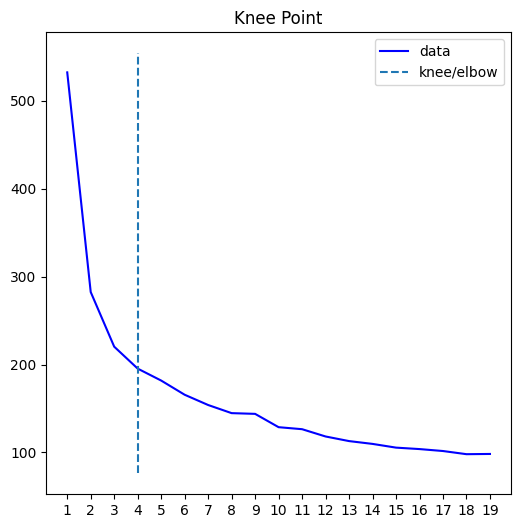

'clusters = Counter({1: 227, 0: 211, 2: 197, 3: 179})'

In [80]:
distortions = []
k = range(1, 20)

for kInd in k:
  kmeanModel = KMeans(n_clusters=kInd)
  kmeanModel.fit(df)
  # Сумма квадратов расстояний выборок до их ближайшего центра кластера
  distortions.append(kmeanModel.inertia_)

kneeLocator = KneeLocator(
  k,
  distortions,
  curve="convex",
  direction="decreasing"
)

# График
kneeLocator.plot_knee()
plt.xticks(np.arange(min(k), max(k) + 1, 1.0))
plt.show()


# Кластеоы
kmeanModel = KMeans(n_clusters=kneeLocator.knee)
kmeanModel = kmeanModel.fit_predict(df)

display(f"clusters = {Counter(kmeanModel)}")

### 2.4. DBSCAN

'knee = 0.2525507314312697'

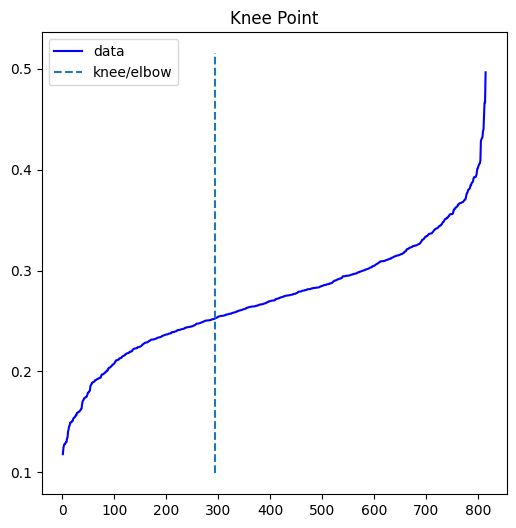

'clusters = Counter({-1: 664, 0: 79, 1: 31, 2: 16, 5: 9, 4: 9, 3: 6})'

In [81]:
# Поиск knee
neighbors = NearestNeighbors().fit(df)
neighborsDist, neighborsInd = neighbors.kneighbors(df)
sortNeighborDist = np.sort(neighborsDist, axis=0)

x = range(1, len(neighborsDist) + 1)
y = sortNeighborDist[:, 3]

kneeLocator = KneeLocator(x, y, curve="convex", S=35)
knee = kneeLocator.knee_y
display(f"knee = {knee}")

# График
kneeLocator.plot_knee()
plt.show()

# Кластеры
clusters = DBSCAN(eps=knee, min_samples=10).fit(df)
display(f"clusters = {Counter(clusters.labels_)}")

### 2.5. PCA (Метод главных компонент)

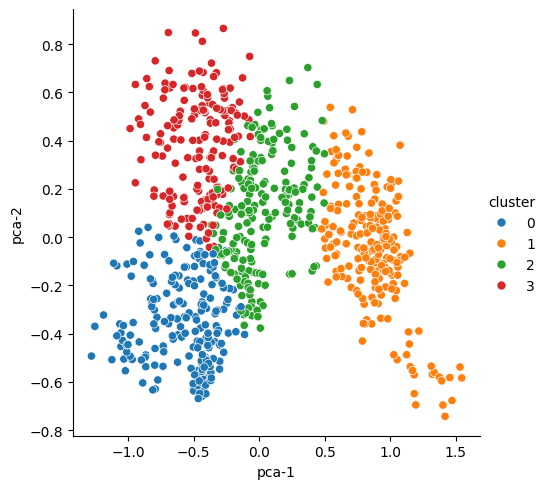

In [82]:
# Используя результаты k-means
subsetLen = len(df)
subsetDf = df[:subsetLen]

PCAModel = PCA(n_components=2)
PCAData = PCAModel.fit_transform(subsetDf)

PCADf = pd.DataFrame()
PCADf['pca-1'] = PCAData[:, 0]
PCADf['pca-2'] = PCAData[:, 1]

PCADf['cluster'] = kmeanModel[: subsetLen]
PCADf['cluster'] = PCADf['cluster'].astype('category')

sns.relplot(x='pca-1', y='pca-2', hue="cluster", data=PCADf)
plt.show()

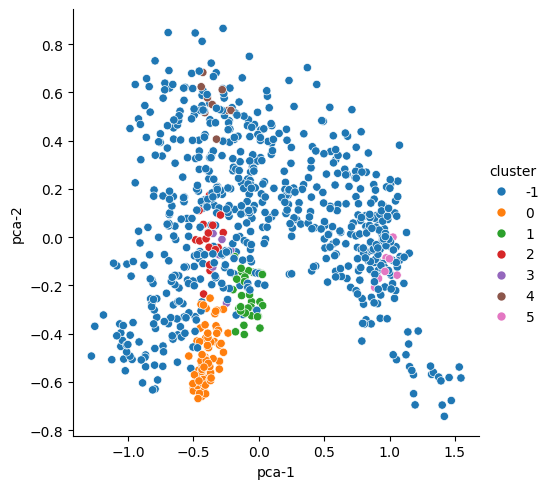

In [83]:
# Используя результаты DBSCAN
PCADf['cluster'] = clusters.labels_[:subsetLen]
PCADf['cluster'] = PCADf['cluster'].astype('category')

sns.relplot(x='pca-1', y='pca-2', hue="cluster", data=PCADf)
plt.show()

### 2.6. t-SNE (Стохастическое вложение соседей с t-распределением)

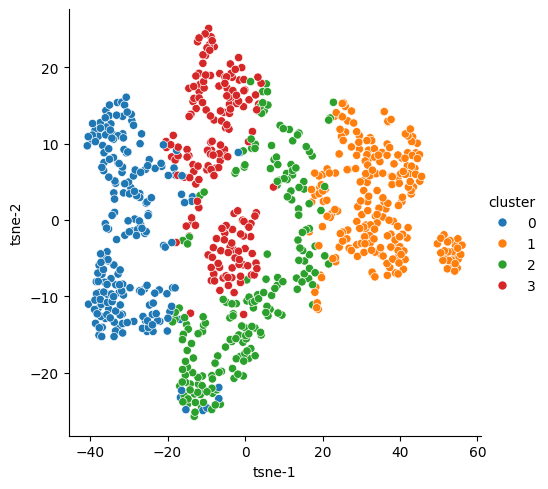

In [84]:
# Используя результаты k-means
subsetLen = len(df)
subsetDf = df[:subsetLen]

tSNEModel = TSNE(n_components=2)
tSNEData = tSNEModel.fit_transform(subsetDf)

tSNEDf = pd.DataFrame()
tSNEDf['tsne-1'] = tSNEData[:, 0]
tSNEDf['tsne-2'] = tSNEData[:, 1]

tSNEDf['cluster'] = kmeanModel[: subsetLen]
tSNEDf['cluster'] = tSNEDf['cluster'].astype('category')

sns.relplot(x='tsne-1', y='tsne-2', hue="cluster", data=tSNEDf)
plt.show()

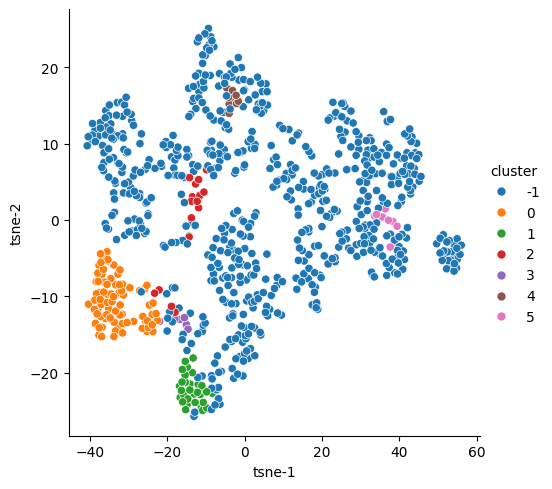

In [85]:
# Используя результаты DBSCAN
tSNEDf['cluster'] = clusters.labels_[:subsetLen]
tSNEDf['cluster'] = tSNEDf['cluster'].astype('category')

sns.relplot(x='tsne-1', y='tsne-2', hue="cluster", data=tSNEDf)
plt.show()

In [86]:
dfCopy['cluster_kmeans'] = kmeanModel
dfCopy['cluster_kmeans'] = dfCopy['cluster_kmeans'].astype('category')

dfCopyFilter = dfCopy[dfCopy.cluster_kmeans == 0]
dfCopyFilter.describe()

,COMPACTNESS,CIRCULARITY,DISTANCE CIRCULARITY,RADIUS RATIO,PR.AXIS ASPECT RATIO,MAX.LENGTH ASPECT RATIO,SCATTER RATIO,ELONGATEDNESS,PR.AXIS RECTANGULARITY,MAX.LENGTH RECTANGULARITY,SCALED VARIANCE_MAJOR,SCALED VARIANCE_MINOR,SCALED RADIUS OF GYRATION,SKEWNESS ABOUT_MAJOR,SKEWNESS ABOUT_MINOR,KURTOSIS ABOUT_MAJOR,KURTOSIS ABOUT_MINOR,HOLLOWS RATIO
count,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000
mean,85.341232,41.004739,66.407583,132.099526,57.407583,6.611374,141.436019,48.118483,18.526066,138.663507,162.597156,295.459716,159.454976,78.516588,5.720379,10.260664,182.364929,186.739336
std,4.299187,3.297182,7.842785,14.191364,4.881914,1.316801,11.670452,4.321617,0.745164,8.789905,12.874996,47.076554,19.077327,5.025976,4.475596,7.168271,3.177975,3.693407
min,73.000000,33.000000,40.000000,104.000000,48.000000,3.000000,112.000000,41.000000,17.000000,118.000000,130.000000,184.000000,119.000000,69.000000,0.000000,0.000000,176.000000,181.000000
25%,82.000000,38.000000,63.000000,121.500000,54.000000,6.000000,133.000000,45.000000,18.000000,131.000000,154.000000,259.000000,144.000000,74.000000,2.000000,4.000000,180.000000,184.000000
50%,85.000000,42.000000,68.000000,130.000000,56.000000,7.000000,147.000000,46.000000,19.000000,141.000000,167.000000,318.000000,162.000000,78.000000,5.000000,9.000000,182.000000,186.000000
75%,87.000000,44.000000,71.000000,140.000000,60.000000,7.000000,150.000000,51.000000,19.000000,145.000000,171.000000,331.500000,174.500000,82.000000,8.000000,15.000000,185.000000,190.000000
max,98.000000,48.000000,86.000000,180.000000,75.000000,11.000000,162.000000,61.000000,20.000000,165.000000,194.000000,388.000000,199.000000,87.000000,19.000000,30.000000,191.000000,196.000000


In [87]:
dfCopyFilter = dfCopy[dfCopy.cluster_kmeans == 1]
dfCopyFilter.describe()

,COMPACTNESS,CIRCULARITY,DISTANCE CIRCULARITY,RADIUS RATIO,PR.AXIS ASPECT RATIO,MAX.LENGTH ASPECT RATIO,SCATTER RATIO,ELONGATEDNESS,PR.AXIS RECTANGULARITY,MAX.LENGTH RECTANGULARITY,SCALED VARIANCE_MAJOR,SCALED VARIANCE_MINOR,SCALED RADIUS OF GYRATION,SKEWNESS ABOUT_MAJOR,SKEWNESS ABOUT_MINOR,KURTOSIS ABOUT_MAJOR,KURTOSIS ABOUT_MINOR,HOLLOWS RATIO
count,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.00000,227.000000,227.000000,227.000000,227.000000,227.000000
mean,103.537445,52.753304,102.229075,201.105727,62.061674,9.700441,214.881057,31.026432,24.207048,165.577093,228.462555,687.370044,212.92511,72.162996,6.920705,15.268722,188.317181,196.559471
std,4.429603,2.876657,5.020352,18.645442,5.896278,2.064909,14.344650,1.855202,1.271312,8.030749,16.092711,89.856447,19.74413,5.105510,4.880235,9.715558,3.115166,5.726799
min,91.000000,45.000000,80.000000,154.000000,47.000000,4.000000,188.000000,26.000000,22.000000,147.000000,206.000000,527.000000,159.00000,61.000000,0.000000,0.000000,179.000000,181.000000
25%,100.500000,51.000000,100.000000,188.500000,58.000000,9.000000,206.000000,30.000000,23.000000,161.000000,220.000000,634.000000,201.00000,69.000000,3.000000,6.500000,187.000000,195.000000
50%,104.000000,53.000000,103.000000,202.000000,62.000000,10.000000,214.000000,31.000000,24.000000,166.000000,225.000000,681.000000,214.00000,72.000000,6.000000,14.000000,188.000000,197.000000
75%,107.000000,55.000000,105.500000,214.000000,67.000000,11.000000,220.000000,32.000000,25.000000,172.000000,231.000000,714.500000,222.00000,74.000000,11.000000,22.500000,190.000000,200.000000
max,116.000000,59.000000,112.000000,246.000000,75.000000,13.000000,262.000000,35.000000,28.000000,188.000000,288.000000,998.000000,268.00000,87.000000,19.000000,39.000000,198.000000,208.000000
